# Alexis Casas: Titanic: Machine Learning from Disaster Competition

## The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [177]:
#1. read the data
training_set <- read.csv('train.csv')
test_set <- read.csv('test.csv')

In [178]:
#View data
head(training_set)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [179]:
test_set[test_set==""]  <- NA
training_set[training_set==""]  <- NA

In [180]:
#Checking Columns for Missing values: Training Set
library(questionr)
missingvaluestable <- freq.na(training_set)
missingvaluestable

,missing,%
Cabin,687,77
Age,177,20
Embarked,2,0
PassengerId,0,0
Survived,0,0
Pclass,0,0
Name,0,0
Sex,0,0
SibSp,0,0
Parch,0,0


In [181]:
#Checking Columns for Missing values: Test Set
missingvaluestable <- freq.na(test_set)
missingvaluestable

,missing,%
Cabin,327,78
Age,86,21
Fare,1,0
PassengerId,0,0
Pclass,0,0
Name,0,0
Sex,0,0
SibSp,0,0
Parch,0,0
Ticket,0,0


Cabin has about 78% of the data missing. I will delete this column for both sets. Both datasets are missing about 20% of their data in Age. Because Age seems important in predicting who would survive, I would rather not delete this. Will investigate more about this colum before making any decisions

In [182]:
head(training_set)#cabin is column 11
head(test_set) #cabin is column 10

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NA,S


In [183]:
training_set <- training_set[,-11]
test_set <- test_set[,-10]

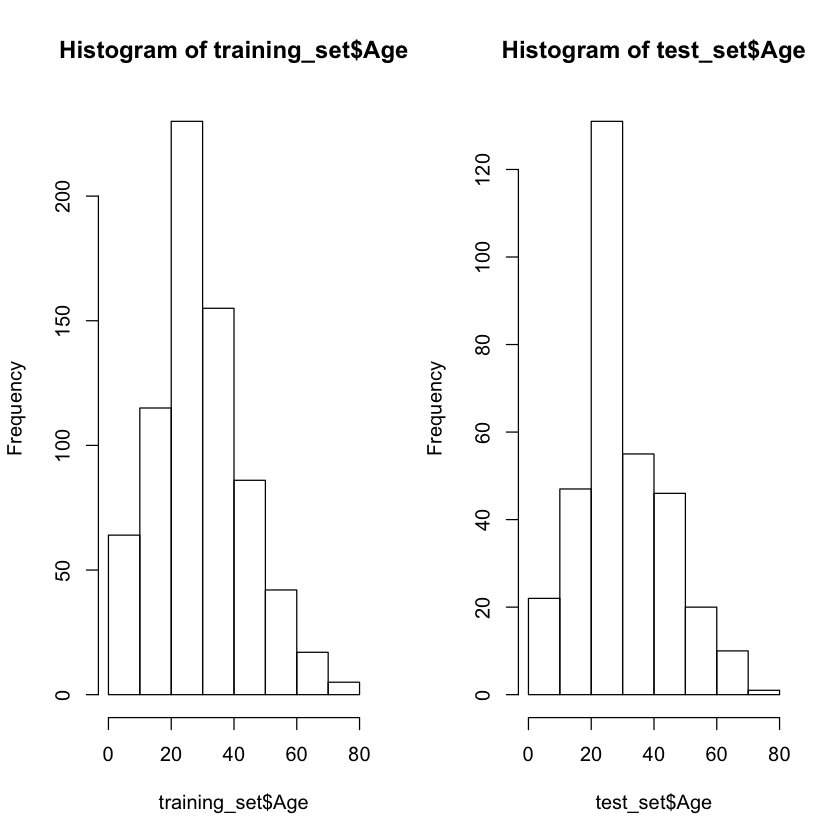

In [184]:
par(mfrow=c(1,2))
hist(training_set$Age)
hist(test_set$Age)

In [185]:
#what is the meadian and mean age?
median(training_set$Age,na.rm = T) #about 28 years old
mean(training_set$Age,na.rm = T)
#Because the data is skewed i will impute based on the median.

[1] 28

[1] 29.69912

In [186]:
training_set$Age[is.na(training_set$Age)] <- median(training_set$Age,na.rm = T) 
test_set$Age[is.na(test_set$Age)] <- median(test_set$Age,na.rm = T) 

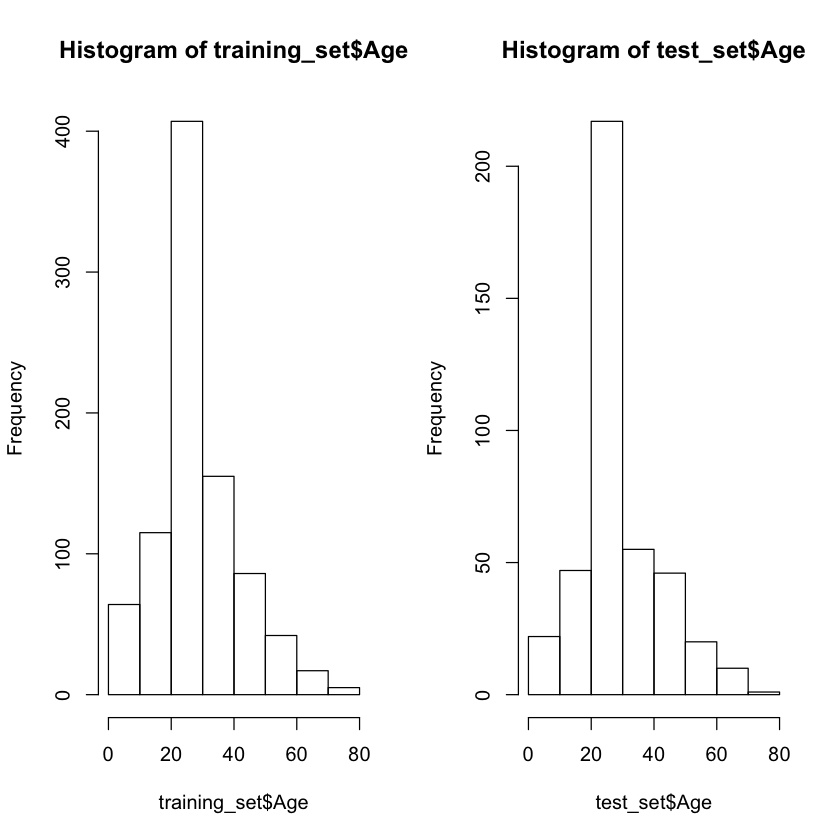

In [187]:
par(mfrow=c(1,2))
hist(training_set$Age)
hist(test_set$Age)

In [188]:
#checking if missing values are gone
missingvaluestable <- freq.na(training_set)
missingvaluestable #two values in embarked column

,missing,%
Embarked,2,0
PassengerId,0,0
Survived,0,0
Pclass,0,0
Name,0,0
Sex,0,0
Age,0,0
SibSp,0,0
Parch,0,0
Ticket,0,0


In [189]:
missingvaluestable <- freq.na(test_set)
missingvaluestable #one missing value for fare

,missing,%
Fare,1,0
PassengerId,0,0
Pclass,0,0
Name,0,0
Sex,0,0
Age,0,0
SibSp,0,0
Parch,0,0
Ticket,0,0
Embarked,0,0


In [190]:
training_set <- training_set[-which(is.na(training_set$Embarked)),]
test_set <- test_set[-which(is.na(test_set$Fare)),]

In [191]:
missingvaluestable <- freq.na(test_set)
missingvaluestable #All Clean!

,missing,%
PassengerId,0,0
Pclass,0,0
Name,0,0
Sex,0,0
Age,0,0
SibSp,0,0
Parch,0,0
Ticket,0,0
Fare,0,0
Embarked,0,0


Next, I believe that it may be nice to know someone's age group rather than their specific age for future predictions.


In [192]:
training_set$AgeGroup <- training_set$Age
training_set$AgeGroup[training_set$Age>=0 & training_set$Age<10] <- 1
training_set$AgeGroup[training_set$Age>=10 & training_set$Age<20] <- 2
training_set$AgeGroup[training_set$Age>=20 & training_set$Age<30] <- 3
training_set$AgeGroup[training_set$Age>=30 & training_set$Age<40] <- 4
training_set$AgeGroup[training_set$Age>=40 & training_set$Age<50] <- 5
training_set$AgeGroup[training_set$Age>=50 & training_set$Age<60] <- 6
training_set$AgeGroup[training_set$Age>=60 & training_set$Age<70] <- 7
training_set$AgeGroup[training_set$Age>=70 & training_set$Age<80] <- 8

In [193]:
test_set$AgeGroup <- test_set$Age
test_set$AgeGroup[test_set$Age>=0 & test_set$Age<10] <- 1
test_set$AgeGroup[test_set$Age>=10 & test_set$Age<20] <- 2
test_set$AgeGroup[test_set$Age>=20 & test_set$Age<30] <- 3
test_set$AgeGroup[test_set$Age>=30 & test_set$Age<40] <- 4
test_set$AgeGroup[test_set$Age>=40 & test_set$Age<50] <- 5
test_set$AgeGroup[test_set$Age>=50 & test_set$Age<60] <- 6
test_set$AgeGroup[test_set$Age>=60 & test_set$Age<70] <- 7
test_set$AgeGroup[test_set$Age>=70 & test_set$Age<80] <- 8

In [194]:
#Next I will examine the structure and encode variables. 
str(training_set)
str(test_set)

'data.frame':	889 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 28 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 $ AgeGroup   : num  3 4 3 4 4 3 6 1 3 2 ...
'data.frame':	417 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : Factor w/ 418 levels "Abbott, Master. Eugene Joseph",..: 2

In [195]:
#First off we want to delete, name and ticket 
training_set <- training_set[,-c(4,9)]
test_set <- test_set[,-c(3,8)]

In [196]:
str(training_set)
str(test_set)

'data.frame':	889 obs. of  10 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 28 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 $ AgeGroup   : num  3 4 3 4 4 3 6 1 3 2 ...
'data.frame':	417 obs. of  9 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Embarked

In [197]:
#Next, encoding of categorical variables
training_set$Sex <- factor(training_set$Sex, levels=c('male','female'),1:2) #for Sex
training_set$Embarked <- factor(training_set$Embarked, levels=c('S','C','Q'),1:3) #for Embarked

test_set$Sex <- factor(test_set$Sex, levels=c('male','female'),1:2) #for Sex
test_set$Embarked <- factor(test_set$Embarked, levels=c('S','C','Q'),1:3) #for Embarked

In [198]:
str(training_set)
str(test_set)
head(test_set)

'data.frame':	889 obs. of  10 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : Factor w/ 2 levels "1","2": 1 2 2 2 1 1 1 1 2 2 ...
 $ Age        : num  22 38 26 35 35 28 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 3 levels "1","2","3": 1 2 1 1 1 3 1 1 1 2 ...
 $ AgeGroup   : num  3 4 3 4 4 3 6 1 3 2 ...
'data.frame':	417 obs. of  9 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Sex        : Factor w/ 2 levels "1","2": 1 2 1 1 2 1 2 1 2 1 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Embarked   : Factor w/ 3 le

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
,<int>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>,<dbl>
1,892,3,1,34.5,0,0,7.8292,3,4
2,893,3,2,47.0,1,0,7.0000,1,5
3,894,2,1,62.0,0,0,9.6875,3,7
4,895,3,1,27.0,0,0,8.6625,1,3
5,896,3,2,22.0,1,1,12.2875,1,3
6,897,3,1,14.0,0,0,9.2250,1,2


In [199]:
#deleting age since we have age group
training_age <- training_set$Age
test_age <- test_set$Age
training_set <- training_set[,-5]
test_set <- test_set[,-4]

In [200]:
#The response variable is Survived since it is the dependent variable we are trying to predict in our model
#Fitting Logistic onto the training set (glm- generalied linear models)
classifier <- glm(formula = Survived ~ ., 
                  family = binomial,
                  data = training_set[,-1])


In [201]:
#Finding out the probability of prediction
prob_predictions = predict(classifier, type='response', test_set[,-1]) #test without passenger id
y_predict <- ifelse(prob_predictions>=0.5,1,0)
y_predict #scorecard of the predictions

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   1   0   0   1   0   1   0   1   0   0   0   1   0   1   1   0   0   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   1   1   1   0   1   0   0   0   0   0   1   1   0   0   1   1   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   1   1   0   0   0   1   1   0   0   1   1   0   0   0   0   0   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   1   0   1   1   0   1   1   1   0   1   1   1   1   0   1   0   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   1   1   1   0   1   0   1   0   1   0   1   0   1   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   0   0   0   1   0   0   0   0   0   0   1   1   1   1   0   0   1   1   1 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  1   0   1   0   0   1   0   1   0   0   0   0   1   0   0   0   0   0   1   0 
141 142 143 144 145 146 147 148 149 150 151 152 154 155 156 157 158 159 160 161 
  0   1   1   0   0   0   0   0   0   0   1   0   1   0   0   1   1   0   1   1 
162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 
  0   1   0   0   1   1   0   1   1   0   0   0   0   0   1   1   0   1   1   0 
182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 
  0   1   0   1   0   1   0   0   0   0   0   0   0   0   0   1   1   0   1   1 
202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 
  0   1   1   0   1   1   0   1   0   0   0   0   1   0   0   1   0   1   0   1 
222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 
  0   1   0   1   1   0   1   0   0   0   1   0   0   0   0   0   0   1   1   1 
242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 
  1   0   0   0   0   1   0   1   1   1   0   1   0   0   0   0   0   1   0   0 
262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 
  0   1   1   0   0   0   0   1   0   1   0   1   1   0   1   0   0   0   0   1 
282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 
  0   1   1   1   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   0 
302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 
  0   0   0   1   1   0   0   0   1   0   0   0   1   1   1   1   0   0   0   0 
322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 
  0   0   0   1   0   1   1   0   0   1   1   0   1   0   0   0   0   0   0   0 
342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 
  0   0   1   0   1   0   1   0   1   1   0   0   0   1   0   1   0   0   1   0 
362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 
  1   1   0   1   0   0   1   1   0   0   1   0   0   1   1   1   0   0   0   0 
382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 
  0   1   1   0   1   0   0   0   0   0   1   0   0   0   1   0   1   0   0   1 
402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 
  0   1   0   0   0   0   1   1   1   1   1   1   0   1   0   0   0

In [202]:
summary(classifier) 


Call:
glm(formula = Survived ~ ., family = binomial, data = training_set[, 
    -1])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3499  -0.6709  -0.4569   0.6726   2.5427  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.414036   0.378946   1.093   0.2746    
Pclass      -0.854969   0.133033  -6.427  1.3e-10 ***
Sex2         2.722762   0.198198  13.738  < 2e-16 ***
SibSp       -0.237855   0.101562  -2.342   0.0192 *  
Parch       -0.073129   0.114325  -0.640   0.5224    
Fare         0.002393   0.002366   1.011   0.3120    
Embarked2    0.458376   0.230079   1.992   0.0463 *  
Embarked3    0.263279   0.322801   0.816   0.4147    
AgeGroup    -0.018856   0.034097  -0.553   0.5803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1182.82  on 888  degrees of freedom
Residual deviance:  811.66  on 880  degrees of freedom
AIC: 829.

It seems like ther eis a strong correlation between Pclass, Sex factor 2, Sibsp, and Embarked factor 2.

Now lets try and make some real predictions:

In [208]:
str(y_predict)

 Named num [1:417] 0 1 0 0 1 0 1 0 1 0 ...
 - attr(*, "names")= chr [1:417] "1" "2" "3" "4" ...


In [209]:
test_set$Survived <- y_predict

In [244]:
submission_file <- test_set[,c(1,9)]
submission_file
write.csv(submission_file,"gender_submission.csv", row.names = FALSE)

,PassengerId,Survived
,<int>,<dbl>
1,892,0
2,893,1
3,894,0
4,895,0
5,896,1
6,897,0
7,898,1
8,899,0
9,900,1


In [204]:
library(dplyr)
survived_training <- filter(training_set, Survived == 1) 

In [205]:
#Lets take a look at a scorecard of individuals who did survive. What criteria was in place. 
#Common Themes:
#Sex=2 (Female)
#Age Group <=4 (people under the age of 40)
#PClass:
#It looks like if they are in class 3 and dtraveling with no SibSp they can survive, 
#if they are any other class and travelining with SibSp they also will
head(survived_training)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
,<int>,<int>,<int>,<fct>,<int>,<int>,<dbl>,<fct>,<dbl>
1,2,1,1,2,1,0,71.2833,2,4
2,3,1,3,2,0,0,7.9250,1,3
3,4,1,1,2,1,0,53.1000,1,4
4,9,1,3,2,0,2,11.1333,1,3
5,10,1,2,2,1,0,30.0708,2,2
6,11,1,3,2,1,1,16.7000,1,1


In [216]:
#Lets try and predict who will surve for females with an AgeGroup<5
test2 <- filter(test_set, AgeGroup <= 4) 
test2 <- filter(test2, Sex==2)

In [218]:
#My guess is that the model will predict survived for females who are in an AgeGroup<=4. 
prob_predictions = predict(classifier, type='response', test2[,-1])
y_predict <- ifelse(prob_predictions>=0.5,1,0)
y_predict #Looks like the model does predict this survived for most of these cases. 

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   1   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1   1   1   1   1 
121 122 
  1   1

In [233]:
#What about women of any age in first class?
test2 <- filter(test_set, Pclass==1)
test2 <- filter(test2, Sex==2)
prob_predictions = predict(classifier, type='response', test2[,-1])
y_predict <- ifelse(prob_predictions>=0.5,1,0)
y_predict #Women of any age survived


1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [219]:
#What about for men in that age group?
test3 <- filter(test_set, AgeGroup <= 4) 
test3 <- filter(test3, Sex==1)

In [220]:
prob_predictions = predict(classifier, type='response', test3[,-1])
y_predict <- ifelse(prob_predictions>=0.5,1,0)
y_predict #yes, they are most likely not to survive! 

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   1   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [221]:
#What about old men?
test4 <- filter(test_set, AgeGroup > 4) 
test4 <- filter(test3, Sex==1)
prob_predictions = predict(classifier, type='response', test4[,-1])
y_predict <- ifelse(prob_predictions>=0.5,1,0)
y_predict #Sorry men 

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   1   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [226]:
#What about first class men?
test5 <- filter(test_set, Pclass==1)
test5 <- filter(test5, Sex==1)
prob_predictions = predict(classifier, type='response', test5[,-1])
y_predict <- ifelse(prob_predictions>=0.5,1,0)
y_predict

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 0  0  1  0  0  0  0  0  0  0  1  1  1  0  0  1  1  0  1  0  0  0  0  1  0  0 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 
 0  1  1  1  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  1  0  1  1  0  0  0 
53 54 55 56 57 
 0  0  0  0  1

In [229]:
#What about first class men and traveling with more than one Parchild?
test5 <- filter(test_set, Pclass==1)
test5 <- filter(test5, Sex==1)
test5 <- filter(test5, Parch>1)
prob_predictions = predict(classifier, type='response', test5[,-1])
y_predict <- ifelse(prob_predictions>=0.5,1,0)
y_predict #the model predicts about half of these will survive 

1 2 3 4 
0 1 1 0

In [231]:
#What about first class men and traveling with more than one SibSp?
test5 <- filter(test_set, Pclass==1)
test5 <- filter(test5, Sex==1)
test5 <- filter(test5, SibSp>1)
prob_predictions = predict(classifier, type='response', test5[,-1])
y_predict <- ifelse(prob_predictions>=0.5,1,0)
y_predict #the model predicts SibSp is not more important for men than Parchild

1 
0

## Logistic Regression Conclusions:

### The most important factors in determining who survived were: 

Sex (Females were most likely)

Parchild, or SibSp: Whether or not the individual was traveling with others 

Class: First class passengers were most likely to survive


### Here are some senarios and the likeliness of survival:

Women of any age & in first class were very likely to survive.

Women under 40 years old had 100% survival rate.

Older men were very likely not to survive

Men traveling in first class with a parent or child had a 50% chance of survival 


